# Energy Consumption in Latin America - Modeling

## Notebook by: Maria Pinzon

## 1. The Problem

Energy consumption in Latin American countreis is something that be unevenly distributed among many regions, especially in under-priviledged areas. This project hopes to analyze the energy consumption in 28 countries through a range of years based on multiple factors.  

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Data/energy_data_EDA.csv', encoding = 'latin1')
df = df.iloc[:,1:]
df.head()

,country,utility_name,utility_code,utility_ID,year,connection_type,total_number_connections,residential_connections,electricity_sold_year_MWh,distribution_length_km,...,TOTEX_local,energy_losses_technical&nontechnical_%,avg_duration_interruptions_suscriber,avg_frequency_interruptions_subscriber,residential_coverage (#/100 households),avg_residential_tarif_local,avg_industrial_tarif_local,privatization_year,residential_connections_employee,energy_sold_employee
0,Paraguay,ADMINISTRACION NACIONAL DE ELECTRICIDAD (ANDE).,ANDE,209001,1995.0,Elec - Distribution,710188.0,579691.0,3605894.515,33415.54,...,1.090000e+11,0.1731,8.34,17.78,0.694,95460.0000,68920.00000,0.0,222.103831,1381.568780
1,Paraguay,ADMINISTRACION NACIONAL DE ELECTRICIDAD (ANDE).,ANDE,209001,1996.0,Elec - Distribution,785280.0,647040.0,3802143.296,39952.04,...,1.050000e+11,0.1998,18.85,17.29,0.747,117960.0000,85230.00000,0.0,241.252796,1417.652236
2,Paraguay,ADMINISTRACION NACIONAL DE ELECTRICIDAD (ANDE).,ANDE,209001,1997.0,Elec - Distribution,850947.0,707179.0,3973477.997,45892.74,...,1.300000e+11,0.2285,12.65,18.15,0.790,135140.0000,95020.00000,0.0,256.782498,1442.802468
3,Paraguay,ADMINISTRACION NACIONAL DE ELECTRICIDAD (ANDE).,ANDE,209001,1998.0,Elec - Distribution,897494.0,749033.0,4079504.871,48422.20,...,2.740000e+11,0.2366,17.07,21.94,0.816,159890.0000,110890.00000,0.0,250.680388,1365.296142
4,Paraguay,ADMINISTRACION NACIONAL DE ELECTRICIDAD (ANDE).,ANDE,209001,1999.0,Elec - Distribution,856545.0,719159.0,4815296.785,50637.75,...,1.560000e+11,0.2100,7.13,13.32,0.823,161702.9087,98855.26838,0.0,240.200067,1608.315559


In [3]:
df.isnull().sum()

country                                    0
utility_name                               0
utility_code                               0
utility_ID                                 0
year                                       0
connection_type                            0
total_number_connections                   0
residential_connections                    0
electricity_sold_year_MWh                  0
distribution_length_km                     0
num_employees                              0
avg_price_MWh_local                        0
OPEX_local                                 0
CAPEX_local                                0
TOTEX_local                                0
energy_losses_technical&nontechnical_%     0
avg_duration_interruptions_suscriber       0
avg_frequency_interruptions_subscriber     0
residential_coverage (#/100 households)    0
avg_residential_tarif_local                0
avg_industrial_tarif_local                 0
privatization_year                         0
residentia

In [4]:
df['year'] = df['year'].astype('int64')
df = df[df['year'] != 0]
df['year'].unique()

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 1992, 1993, 1994, 1990, 1991, 1987, 1988, 1989, 1985,
       1986, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 2008], dtype=int64)

In [5]:
df['coverage (above 80%)'] = np.where(df['residential_coverage (#/100 households)'] >= 0.8, True, False)
df['coverage (above 80%)'] = df['coverage (above 80%)'].astype(int)
df.head()

,country,utility_name,utility_code,utility_ID,year,connection_type,total_number_connections,residential_connections,electricity_sold_year_MWh,distribution_length_km,...,energy_losses_technical&nontechnical_%,avg_duration_interruptions_suscriber,avg_frequency_interruptions_subscriber,residential_coverage (#/100 households),avg_residential_tarif_local,avg_industrial_tarif_local,privatization_year,residential_connections_employee,energy_sold_employee,coverage (above 80%)
0,Paraguay,ADMINISTRACION NACIONAL DE ELECTRICIDAD (ANDE).,ANDE,209001,1995,Elec - Distribution,710188.0,579691.0,3605894.515,33415.54,...,0.1731,8.34,17.78,0.694,95460.0000,68920.00000,0.0,222.103831,1381.568780,0
1,Paraguay,ADMINISTRACION NACIONAL DE ELECTRICIDAD (ANDE).,ANDE,209001,1996,Elec - Distribution,785280.0,647040.0,3802143.296,39952.04,...,0.1998,18.85,17.29,0.747,117960.0000,85230.00000,0.0,241.252796,1417.652236,0
2,Paraguay,ADMINISTRACION NACIONAL DE ELECTRICIDAD (ANDE).,ANDE,209001,1997,Elec - Distribution,850947.0,707179.0,3973477.997,45892.74,...,0.2285,12.65,18.15,0.790,135140.0000,95020.00000,0.0,256.782498,1442.802468,0
3,Paraguay,ADMINISTRACION NACIONAL DE ELECTRICIDAD (ANDE).,ANDE,209001,1998,Elec - Distribution,897494.0,749033.0,4079504.871,48422.20,...,0.2366,17.07,21.94,0.816,159890.0000,110890.00000,0.0,250.680388,1365.296142,1
4,Paraguay,ADMINISTRACION NACIONAL DE ELECTRICIDAD (ANDE).,ANDE,209001,1999,Elec - Distribution,856545.0,719159.0,4815296.785,50637.75,...,0.2100,7.13,13.32,0.823,161702.9087,98855.26838,0.0,240.200067,1608.315559,1


In [6]:
df['coverage (above 80%)'].value_counts()

0    3157
1     915
Name: coverage (above 80%), dtype: int64

In [7]:
populations = pd.read_csv('countries.csv')
populations.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,58044.0,58377.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,Africa Eastern and Southern,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,156876454.0,161156430.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,Afghanistan,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,10637064.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,Africa Western and Central,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,112195950.0,114781116.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,Angola,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,5774440.0,5771973.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


In [8]:
populations = populations.melt(id_vars=['Country Name'], var_name = ['Year'], value_name = 'Population')

In [9]:
populations.head()

,Country Name,Year,Population
0,Aruba,1960,54208.0
1,Africa Eastern and Southern,1960,130836765.0
2,Afghanistan,1960,8996967.0
3,Africa Western and Central,1960,96396419.0
4,Angola,1960,5454938.0


In [10]:
populations.rename(columns = {'Country Name':'country', 'Year':'year', 'Population':'population'}, inplace=True)
populations.head()

,country,year,population
0,Aruba,1960,54208.0
1,Africa Eastern and Southern,1960,130836765.0
2,Afghanistan,1960,8996967.0
3,Africa Western and Central,1960,96396419.0
4,Angola,1960,5454938.0


In [11]:
populations['year'] = populations['year'].astype('int64')

In [12]:
populations['year'].unique()

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [13]:
populations.dtypes

country        object
year            int64
population    float64
dtype: object

In [14]:
populations.isna().sum()

country         0
year            0
population    103
dtype: int64

In [15]:
populations['population'] = populations.groupby('country')['population'].apply(lambda x:x.fillna(x.mean()))

In [16]:
populations.isna().sum()

country        0
year           0
population    61
dtype: int64

In [17]:
populations = populations.fillna('Unknown')
populations.isna().sum()

country       0
year          0
population    0
dtype: int64

In [18]:
df_main = df.merge(populations, on = ['country', 'year'])

In [19]:
df_main['year'].unique()

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 1992, 1993, 1994, 1990, 1991, 1987, 1988, 1989, 1985,
       1986, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 2008], dtype=int64)

In [20]:
df_main.head()
df_main.dtypes

country                                     object
utility_name                                object
utility_code                                object
utility_ID                                  object
year                                         int64
connection_type                             object
total_number_connections                   float64
residential_connections                    float64
electricity_sold_year_MWh                  float64
distribution_length_km                     float64
num_employees                              float64
avg_price_MWh_local                        float64
OPEX_local                                 float64
CAPEX_local                                float64
TOTEX_local                                float64
energy_losses_technical&nontechnical_%     float64
avg_duration_interruptions_suscriber       float64
avg_frequency_interruptions_subscriber     float64
residential_coverage (#/100 households)    float64
avg_residential_tarif_local    

In [21]:
df_main.isna().sum()

country                                    0
utility_name                               0
utility_code                               0
utility_ID                                 0
year                                       0
connection_type                            0
total_number_connections                   0
residential_connections                    0
electricity_sold_year_MWh                  0
distribution_length_km                     0
num_employees                              0
avg_price_MWh_local                        0
OPEX_local                                 0
CAPEX_local                                0
TOTEX_local                                0
energy_losses_technical&nontechnical_%     0
avg_duration_interruptions_suscriber       0
avg_frequency_interruptions_subscriber     0
residential_coverage (#/100 households)    0
avg_residential_tarif_local                0
avg_industrial_tarif_local                 0
privatization_year                         0
residentia

In [22]:
df_main

,country,utility_name,utility_code,utility_ID,year,connection_type,total_number_connections,residential_connections,electricity_sold_year_MWh,distribution_length_km,...,avg_duration_interruptions_suscriber,avg_frequency_interruptions_subscriber,residential_coverage (#/100 households),avg_residential_tarif_local,avg_industrial_tarif_local,privatization_year,residential_connections_employee,energy_sold_employee,coverage (above 80%),population
0,Paraguay,ADMINISTRACION NACIONAL DE ELECTRICIDAD (ANDE).,ANDE,209001,1995,Elec - Distribution,710188.0,579691.0,3.605895e+06,33415.54,...,8.34,17.78,0.694,95460.0,68920.0,0.0,222.103831,1381.568780,0,4776838.0
1,Paraguay,COMPAÃÂIA LUZ Y FUERZA S.A. (CLYFSA),CLYFSA,209002,1995,Elec - Distribution,0.0,0.0,3.712800e+04,170.00,...,0.00,0.00,0.000,358250.0,221938.0,1.0,216.883974,939.291346,0,4776838.0
2,Paraguay,ADMINISTRACION NACIONAL DE ELECTRICIDAD (ANDE).,ANDE,209001,1996,Elec - Distribution,785280.0,647040.0,3.802143e+06,39952.04,...,18.85,17.29,0.747,117960.0,85230.0,0.0,241.252796,1417.652236,0,4887638.0
3,Paraguay,COMPAÃÂIA LUZ Y FUERZA S.A. (CLYFSA),CLYFSA,209002,1996,Elec - Distribution,0.0,0.0,3.712800e+04,170.00,...,0.00,0.00,0.000,358250.0,221938.0,1.0,216.883974,939.291346,0,4887638.0
4,Paraguay,ADMINISTRACION NACIONAL DE ELECTRICIDAD (ANDE).,ANDE,209001,1997,Elec - Distribution,850947.0,707179.0,3.973478e+06,45892.74,...,12.65,18.15,0.790,135140.0,95020.0,0.0,256.782498,1442.802468,0,4998096.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3736,Jamaica,JAMAICA PUBLIC SERVICE COMPANY LIMITED,JPS,211001,2003,Elec - Distribution,516681.0,462107.0,2.998345e+06,12000.00,...,0.00,0.00,0.000,8668.0,7082.0,1.0,362.436863,2351.643137,0,2709438.0
3737,Jamaica,JAMAICA PUBLIC SERVICE COMPANY LIMITED,JPS,211001,2004,Elec - Distribution,536434.0,480665.0,2.975509e+06,12000.00,...,0.00,0.00,0.000,8076.0,6350.0,1.0,320.443333,1983.672667,0,2725017.0
3738,Jamaica,JAMAICA PUBLIC SERVICE COMPANY LIMITED,JPS,211001,2005,Elec - Distribution,548446.0,491452.0,3.055154e+06,12000.00,...,0.00,0.00,0.000,8538.0,6915.0,1.0,307.157500,1909.471250,0,2740000.0
3739,Jamaica,JAMAICA PUBLIC SERVICE COMPANY LIMITED,JPS,211001,2006,Elec - Distribution,571045.0,511039.0,3.120669e+06,12000.00,...,0.00,0.00,0.000,9010.0,7380.0,1.0,300.611176,1835.687647,0,2754414.0


## Modeling

In [23]:
from sklearn.model_selection import train_test_split

X = df_main.loc[:, df_main.columns != 'coverage (above 80%)']
y = df_main['coverage (above 80%)']
X = pd.get_dummies(X)

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [25]:
#ML models
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import tree,metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix, roc_curve, auc

### Logistic Regression

In [26]:
param_grid ={ 'C' : [0.001,0.01,0.1,1,10,100, 1000], 'penalty': ['l1','l2']}
clf = GridSearchCV(LogisticRegression(), param_grid, cv=10)
clf.fit(X_train, y_train)
print('Best parameters: ', clf.best_params_)

Best parameters:  {'C': 0.001, 'penalty': 'l2'}


In [69]:
lr = LogisticRegression(C = 0.001, penalty='l2')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test,y_pred_lr)
print('Accuracy: ', accuracy_lr)

Accuracy:  0.6001780943900267


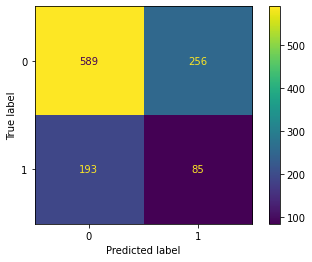

In [64]:
plot_confusion_matrix(LogReg, X_test, y_test)

In [76]:
cv_score_test_lr = cross_val_score(lr, X_test, y_test, cv=5, scoring = 'roc_auc')
test_mean_lr = cv_score_test_lr.mean()
test_std_lr = cv_score_test_lr.std()
cv_score_train_lr = cross_val_score(lr, X_train, y_train, cv=5, scoring = 'roc_auc')
train_mean_lr = cv_score_train_lr.mean()
train_std_lr = cv_score_train_lr.std()
print('Test Data')
print('Scores : ', cv_score_test_lr)
print('Mean: ', test_mean_lr)
print('Stantard Deviation: ', test_std_lr)
print(' ')
print('Training Data')
print('Scores : ', cv_score_train_lr)
print('Mean: ', train_mean_lr)
print('Stantard Deviation: ', train_std_lr)

Test Data
Scores :  [0.51204565 0.60101437 0.51257396 0.45476062 0.50048413]
Mean:  0.5161757473295935
Stantard Deviation:  0.047425028622114146
 
Training Data
Scores :  [0.54129323 0.50670677 0.51466667 0.49215781 0.53828119]
Mean:  0.5186211334788584
Stantard Deviation:  0.018753341145251227


### Random Forest

In [72]:
rf = RandomForestClassifier(bootstrap = True, n_estimators= 120, criterion = 'gini')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test,y_pred_rf)
print('Accuracy: ', accuracy_rf)

Accuracy:  0.993766696349065


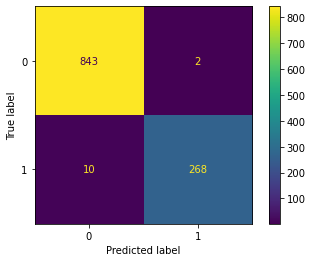

In [49]:
plot_confusion_matrix(rf, X_test, y_test)

In [74]:
cv_score_test_rf = cross_val_score(rf, X_test, y_test, cv=5, scoring = 'roc_auc')
test_mean_rf = cv_score_test_rf.mean()
test_std_rf = cv_score_test_rf.std()
cv_score_train_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring = 'roc_auc')
train_mean_rf = cv_score_train_rf.mean()
train_std_rf = cv_score_train_rf.std()
print('Test Data')
print('Scores : ', cv_score_test_rf)
print('Mean: ', test_mean_rf)
print('Stantard Deviation: ', test_std_rf)
print(' ')
print('Training Data')
print('Scores : ', cv_score_train_rf)
print('Mean: ', train_mean_rf)
print('Stantard Deviation: ', train_std_rf)

Test Data
Scores :  [0.99947168 0.98816568 0.99968301 0.99989242 1.        ]
Mean:  0.9974425574425574
Stantard Deviation:  0.00464197660051378
 
Training Data
Scores :  [0.99993985 0.99973935 0.999599   1.         0.99919153]
Mean:  0.9996939445387664
Stantard Deviation:  0.0002890117239207541


### K-Nearest Neighbor (KNN)

In [73]:
knn = KNeighborsClassifier(n_neighbors= 60, weights = 'distance')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test,y_pred_knn)
print('Accuracy: ', accuracy_knn)

Accuracy:  0.8058771148708815


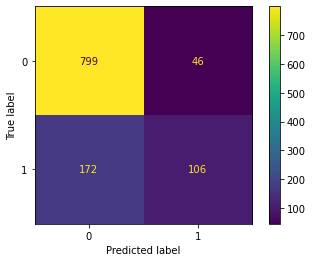

In [52]:
plot_confusion_matrix(knn, X_test, y_test)

In [75]:
cv_score_test_knn = cross_val_score(knn, X_test, y_test, cv=5, scoring = 'roc_auc')
test_mean_knn = cv_score_test_knn.mean()
test_std_knn = cv_score_test_knn.std()
cv_score_train_knn = cross_val_score(knn, X_train, y_train, cv=5, scoring = 'roc_auc')
train_mean_knn = cv_score_train_knn.mean()
train_std_knn = cv_score_train_knn.std()
print('Test Data')
print('Scores : ', cv_score_test_knn)
print('Mean: ', test_mean_knn)
print('Stantard Deviation: ', test_std_knn)
print(' ')
print('Training Data')
print('Scores : ', cv_score_train_knn)
print('Mean: ', train_mean_knn)
print('Stantard Deviation: ', train_std_knn)

Test Data
Scores :  [0.84911243 0.8045224  0.80246196 0.83033889 0.77762238]
Mean:  0.8128116114654576
Stantard Deviation:  0.02465385630450943
 
Training Data
Scores :  [0.86913283 0.85545865 0.87374436 0.8806492  0.86108416]
Mean:  0.8680138410542486
Stantard Deviation:  0.008937524775843034


### Model Comparison

In [77]:
models = ['Logistic Regression', 'Random Forest', 'K-Nearest Neighbors']
test_score = [test_mean_lr, test_mean_rf, test_mean_knn]
train_score = [train_mean_lr, train_mean_rf, train_mean_knn]
accuracy = [accuracy_lr, accuracy_rf, accuracy_knn]

model_accuracy = pd.DataFrame(list(zip(models, accuracy)), columns = ['Algorithm', 'Model Accuracy'])
model_roc = pd.DataFrame(list(zip(models, train_score, test_score)), columns = ['Algorithm', 'ROC-AUC Train Score', 'ROC-AUC Test Score'])

print(model_accuracy)
print(' ')
print(model_roc)

             Algorithm  Model Accuracy
0  Logistic Regression        0.600178
1        Random Forest        0.993767
2  K-Nearest Neighbors        0.805877
 
             Algorithm  ROC-AUC Train Score  ROC-AUC Test Score
0  Logistic Regression             0.518621            0.516176
1        Random Forest             0.999694            0.997443
2  K-Nearest Neighbors             0.868014            0.812812


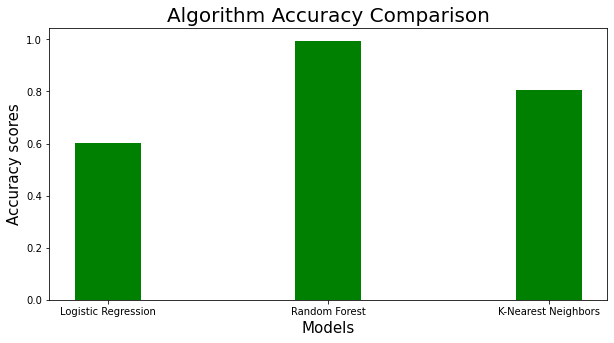

In [87]:
# Accuracy scores plot

plt.figure(figsize = (10,5))
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Accuracy scores', fontsize = 15)
plt.title('Algorithm Accuracy Comparison', fontsize=20)
plt.bar(models, accuracy, tick_label = models, width=0.3, color = 'green')
plt.show()

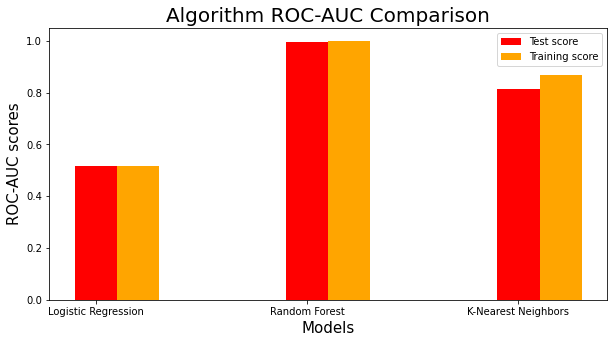

In [91]:
# ROC-AUC test/train score plot

index = [1,2,3]
index_acc = [1.2,2.2,3.2]
plt.figure(figsize = (10,5))
plt.xlabel('Models', fontsize = 15)
plt.ylabel('ROC-AUC scores', fontsize = 15)
plt.title('Algorithm ROC-AUC Comparison', fontsize=20)
_= plt.bar(index, test_score, label = 'Test score', width=0.2, color = 'red')
_= plt.bar(index_acc, train_score, label = 'Training score', width=0.2, color = 'orange')
plt.xticks(index, models)
plt.legend()
plt.show()

## Conclusion

From the comparison of the models, the Random Forest model has the highest scores overall followed by the K-Nearest Neighbor model. The Random Forest model has really high scores which would indicate this to be the best model overall